In [1]:
from analysis import *

# Histograms

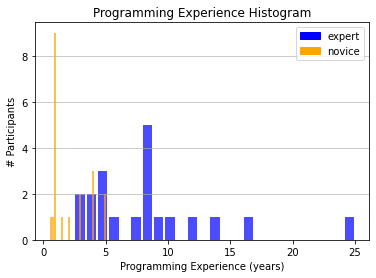

In [2]:
experiences()

# (participant_id, programming_xp, python_xp, professional_xp)
xp = list(map(list, zip(*experiences())))

plt.hist(x=xp[1][:20], bins=25, color='blue',
                      alpha=0.7, rwidth=0.85)
plt.hist(x=xp[1][20:], bins=25, color='orange',
                      alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.8)
plt.xlabel('Programming Experience (years)')
plt.ylabel('# Participants')
plt.title('Programming Experience Histogram')
plt.legend(handles=[expert_patch, novice_patch])
plt.show()

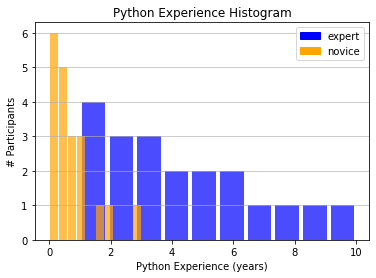

In [3]:
plt.hist(x=xp[2][:20], bins=10, color='blue',
                      alpha=0.7, rwidth=0.85)
plt.hist(x=xp[2][20:], bins=10, color='orange',
                      alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.8)
plt.xlabel('Python Experience (years)')
plt.ylabel('# Participants')
plt.title('Python Experience Histogram')
plt.legend(handles=[expert_patch, novice_patch])
plt.show()

Text(0.5, 1.0, 'Average Session Time Histogram')

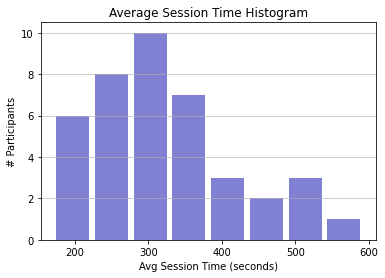

In [4]:
avg_time = avg_session_times()

plt.hist(x=avg_time, bins='auto', color='#0504aa',
                     alpha=0.5, rwidth=0.85)
plt.grid(axis='y', alpha=0.8)
plt.xlabel('Avg Session Time (seconds)')
plt.ylabel('# Participants')
plt.title('Average Session Time Histogram')

# Session Duration and Experience

SPEARMAN'S R FOR PROGRAMMING XP VS. Average Session Duration: -0.0859230137096684
P-VALUE (TWO-TAILED): 0.5980758951620575
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PYTHON XP VS. Average Session Duration: -0.003294291061280795
P-VALUE (TWO-TAILED): 0.983904344114239
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PROFESSIONAL XP VS. Average Session Duration: 0.36151201454688336
P-VALUE (TWO-TAILED): 0.11731512902121055


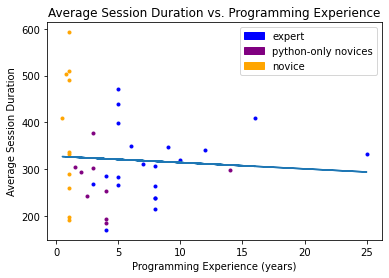

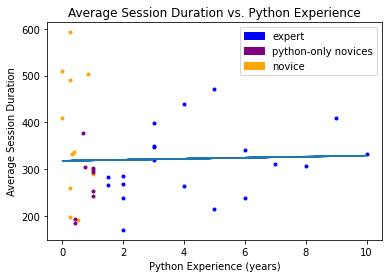

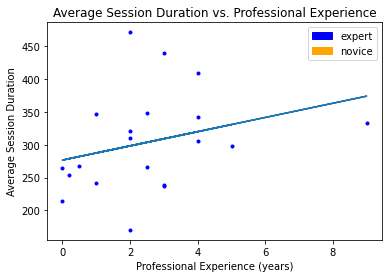

In [5]:
"""Calculate pearsons correlation between total survey
duration and programming experience."""
query = """
SELECT 
    participants.participant_id,
    AVG(sessions.total_time) 'Average Session Duration'
FROM sessions
INNER JOIN participants
ON sessions.participant_id=participants.participant_id
GROUP BY participant_id;
"""
cur.execute(query)
results = cur.fetchall()

avg_time = [0 for k in range(num_participants)] # average session duration

for r in results:
    # r: (participant_id, programming_xp, python_xp, avg_time)
    i = r[0]-1 # participant_id - 1
    avg_time[i] = float(r[1])

get_xp_correlation(avg_time, "Average Session Duration")

# Session Duration and Error Type

In [6]:
# Average session duration per stimuli

dataframe = pd.read_sql("""
            SELECT
                stimuli.stimuli_id,
                stimuli.error_type,
                AVG(sessions.total_time) AS 'Average Session Duration',
                STD(sessions.total_time) AS 'Standard Deviation of Session Duration',
                MIN(sessions.total_time) AS 'Min Session Duration',
                MAX(sessions.total_time) AS 'Max Session Duration'
            FROM stimuli
            INNER JOIN sessions
            ON stimuli.stimuli_id=sessions.stimuli_id
            GROUP BY stimuli.stimuli_id;
            """, con = credentials)

dataframe

,stimuli_id,error_type,Average Session Duration,Standard Deviation of Session Duration,Min Session Duration,Max Session Duration
0,0,SyntaxError,312.324814,157.348859,103.830,600.100
1,1,SyntaxError,350.037641,132.063357,153.542,600.029
2,2,SyntaxError,259.376541,119.752057,108.855,512.487
3,3,SyntaxError,265.063702,122.141667,121.141,560.104
4,4,SyntaxError,320.901583,152.102033,151.350,600.145
5,5,TypeError,443.202816,112.871739,242.951,601.791
6,6,TypeError,200.638725,61.914217,93.077,348.461
7,7,TypeError,344.525611,134.158908,164.853,600.052
8,8,TypeError,339.215898,160.028488,176.592,613.166
9,9,TypeError,363.017328,150.918223,152.382,600.188


### All participants

In [7]:
# Average session duration per error type (ALL participants)
dataframe = pd.read_sql("""
            SELECT
                stimuli.error_type,
                AVG(sessions.total_time) AS 'Average Session Duration',
                STD(sessions.total_time) AS 'Standard Deviation of Session Duration',
                MIN(sessions.total_time) AS 'Min Session Duration',
                MAX(sessions.total_time) AS 'Max Session Duration'
            FROM stimuli
            INNER JOIN sessions USING (stimuli_id)
            GROUP BY stimuli.error_type
            ORDER BY AVG(sessions.total_time);
            """, con = credentials)

dataframe

,error_type,Average Session Duration,Standard Deviation of Session Duration,Min Session Duration,Max Session Duration
0,IndentationError,192.252412,88.418873,100.613,530.786
1,NameError,247.742232,144.844361,64.789,600.063
2,SyntaxError,302.556090,142.267323,103.830,600.145
3,TypeError,324.228051,155.389764,81.941,613.166
4,AttributeError,334.374633,145.732051,63.511,605.905
5,IndexError,367.818389,141.897253,125.773,601.117


### Experts Only

In [8]:
# Experts Only
# Average session duration per error type
sql_query = f"""
            SELECT
                stimuli.error_type,
                AVG(sessions.total_time) AS 'Average Session Duration',
                STD(sessions.total_time) AS 'Standard Deviation of Session Duration',
                MIN(sessions.total_time) AS 'Min Session Duration',
                MAX(sessions.total_time) AS 'Max Session Duration'
            FROM stimuli
            INNER JOIN sessions USING (stimuli_id)
            WHERE sessions.participant_id IN {tuple(experts)}
            GROUP BY stimuli.error_type
            ORDER BY AVG(sessions.total_time);
            """
dataframe = pd.read_sql(sql_query, con = credentials)

dataframe

,error_type,Average Session Duration,Standard Deviation of Session Duration,Min Session Duration,Max Session Duration
0,IndentationError,195.624889,108.772306,100.613,530.786
1,NameError,280.035801,150.994357,64.789,599.998
2,SyntaxError,290.488295,149.703673,108.855,600.145
3,AttributeError,321.176955,124.293555,120.740,601.819
4,TypeError,324.253913,145.485932,93.077,613.166
5,IndexError,361.007385,131.927086,162.201,600.126


### True Novices Only

In [9]:
# True Novices Only
# Average session duration per error type
sql_query = f"""
            SELECT
                stimuli.error_type,
                AVG(sessions.total_time) AS 'Average Session Duration',
                STD(sessions.total_time) AS 'Standard Deviation of Session Duration',
                MIN(sessions.total_time) AS 'Min Session Duration',
                MAX(sessions.total_time) AS 'Max Session Duration'
            FROM stimuli
            INNER JOIN sessions USING (stimuli_id)
            WHERE sessions.participant_id IN {tuple(novices)}
            GROUP BY stimuli.error_type
            ORDER BY AVG(sessions.total_time);
            """
dataframe = pd.read_sql(sql_query, con = credentials)

dataframe

,error_type,Average Session Duration,Standard Deviation of Session Duration,Min Session Duration,Max Session Duration
0,IndentationError,174.539287,57.614463,106.480,270.328
1,NameError,253.182067,150.634831,76.508,600.063
2,SyntaxError,306.684856,154.521620,103.830,600.029
3,TypeError,372.806718,178.104542,96.379,601.791
4,IndexError,409.048533,167.700358,136.520,601.117
5,AttributeError,409.414158,152.887836,158.746,600.132


### Python Novices Only

In [10]:
# Python Novices Only
# Average session duration per error type
sql_query = f"""
            SELECT
                stimuli.error_type,
                AVG(sessions.total_time) AS 'Average Session Duration',
                STD(sessions.total_time) AS 'Standard Deviation of Session Duration',
                MIN(sessions.total_time) AS 'Min Session Duration',
                MAX(sessions.total_time) AS 'Max Session Duration'
            FROM stimuli
            INNER JOIN sessions USING (stimuli_id)
            WHERE sessions.participant_id IN {tuple(middle)}
            GROUP BY stimuli.error_type
            ORDER BY AVG(sessions.total_time);
            """
dataframe = pd.read_sql(sql_query, con = credentials)

dataframe

,error_type,Average Session Duration,Standard Deviation of Session Duration,Min Session Duration,Max Session Duration
0,NameError,173.664169,85.752835,66.783,385.150
1,IndentationError,199.284332,54.529316,127.116,295.077
2,TypeError,271.372303,129.005382,81.941,491.672
3,AttributeError,272.086914,139.310746,63.511,605.905
4,SyntaxError,321.700931,108.403446,132.435,600.071
5,IndexError,333.867154,114.762666,125.773,564.990


SPEARMAN'S R FOR PROGRAMMING XP VS. Average Query Length (characters): 0.29183543422975483
P-VALUE (TWO-TAILED): 0.06766888629941152
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PYTHON XP VS. Average Query Length (characters): 0.3635956105636489
P-VALUE (TWO-TAILED): 0.021098214756310105
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PROFESSIONAL XP VS. Average Query Length (characters): -0.05002053031466311
P-VALUE (TWO-TAILED): 0.8341162985950449


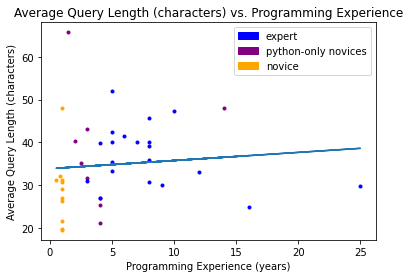

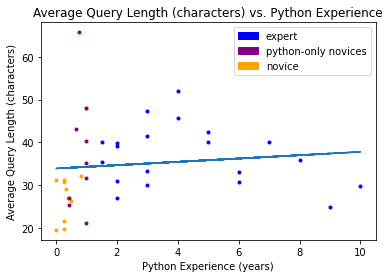

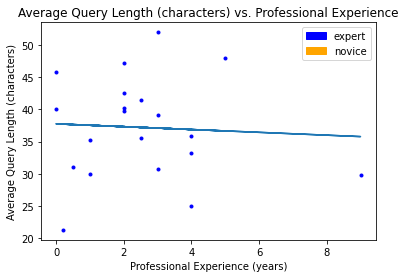

In [11]:
# Average query length vs. Programming XP, Python XP, and Professional (industry) XP
my_query = """
SELECT participants.participant_id,
       queries.query_id,
       queries.query_content
FROM queries
INNER JOIN participants
ON queries.participant_id=participants.participant_id;
"""
cur.execute(my_query)
results = cur.fetchall()

participant_ids = [i for i in range(1, num_participants + 1)]
query_lengths = [[] for k in range(num_participants)]
avg_query_lengths = [0 for k in range(num_participants)]

for r in results:
    # r is a tuple where
    # r[0] = participant_id
    # r[1] = query_id
    # r[2] = query_content
    query_lengths[r[0]-1].append(len(r[2]))

for i, ql in enumerate(query_lengths):
    avg_query_lengths[i] = np.mean(ql)

get_xp_correlation(avg_query_lengths, "Average Query Length (characters)")

# Pythonic Words in Search Query

In [12]:
# Create list of pythonic vocab
vocab = set([word.lower() for line in open('../vocab.txt').readlines() for word in line.split()])

# Remove Python from vocab because too many queries that contain python
vocab.remove('python')

# Remove stopwords
vocab.remove('in')
vocab.remove('is')
vocab.remove('for')
vocab.remove('of')
vocab.remove('not')

In [13]:
# Remove pythonic words for which over X% of all queries contain these words
vocab_to_query_count = dict.fromkeys(vocab, 0)

In [14]:
# Percentage of queries with the corresponding error type in search query
#pythonic_query_percentage = [0 for k in range(num_participants)]

for p_id in range(1, num_participants+1):
    df = pd.read_sql("""
            SELECT
                queries.query_content
            FROM queries
            WHERE participant_id=%s
            """, con = credentials, params= (p_id,))
    
    #pythonic_queries = [0 for k in range(len(df))]
    
    for i, query in enumerate(df.query_content):
        for word in query.split():
            if word in vocab:
                print("'{}' is in '{}'".format(word, query))
                vocab_to_query_count[word] += 1


'object' is in 'funtion object is not scriptable python3'
'with' is in 'concatenation of int with string using + python3'
'string' is in 'concatenation of int with string using + python3'
'with' is in 'can only concatenate str with str python3'
'and' is in 'multiple variabls in for using and python3'
'name' is in 'name not defined in for loop python3'
'and' is in 'and keyword in for loops python3'
'keyword' is in 'and keyword in for loops python3'
'name' is in 'name not defined in for loop python3'
'list' is in 'list has not attribute split python3'
'attribute' is in 'list has not attribute split python3'
'function' is in 'python function call operator on lists'
'list' is in 'python is list callable'
'function' is in 'python cant assign to function call'
'function' is in 'python function object not subscriptable'
'object' is in 'python function object not subscriptable'
'string' is in 'python string join args'
'list' is in 'python how to add element to list'
'list' is in 'python list +

'function' is in 'py function syntax error'
'function' is in 'py function end syntax error'
'function' is in 'py function syntax error'
'function' is in 'py function'
'function' is in 'py function syntax error'
'def' is in 'python def invalid syntax'
'function' is in 'python function invalid syntax'
'function' is in 'py function syntax error'
'type' is in 'py type error string indices int'
'string' is in 'py type error string indices int'
'iterable' is in 'py dict int not iterable'
'string' is in 'py typeerror concatenate string int'
'string' is in 'py typeerror only concatenate string int'
'string' is in 'py index error string'
'list' is in 'py list index out of range'
'list' is in 'py list assignment index'
'list' is in 'py list assignment index out of range'
'name' is in 'py name error'
'list' is in 'py list comp multiple variables'
'list' is in 'py list comp multiple lists'
'list' is in 'py list comp list product'
'list' is in 'py list comp list product'
'list' is in 'py list comp 

In [15]:
pythonic_query_percentage = [0 for k in range(num_participants)]

for p_id in range(1, num_participants+1):
    df = pd.read_sql("""
            SELECT
                queries.query_content
            FROM queries
            WHERE participant_id=%s
            """, con = credentials, params= (p_id,))
    
    pythonic_queries = [0 for k in range(len(df))]
    
    for i, query in enumerate(df.query_content):
        for word in query.split():
            if word in vocab:
                pythonic_queries[i] = 1
                break
    
    num_queries_pythonic = sum(pythonic_queries)
    pythonic_query_percentage[p_id-1] = num_queries_pythonic/len(df)

pythonic_query_percentage

[0.5333333333333333,
 0.8666666666666667,
 0.45454545454545453,
 1.0,
 0.6666666666666666,
 0.75,
 0.4782608695652174,
 0.6,
 0.45,
 0.9473684210526315,
 0.96,
 0.6538461538461539,
 0.7857142857142857,
 0.8571428571428571,
 0.6190476190476191,
 0.6470588235294118,
 0.9259259259259259,
 0.42105263157894735,
 0.6153846153846154,
 0.7333333333333333,
 0.5714285714285714,
 0.7692307692307693,
 0.5714285714285714,
 0.5714285714285714,
 0.36666666666666664,
 0.8461538461538461,
 0.8,
 0.42857142857142855,
 0.8260869565217391,
 0.2903225806451613,
 0.8857142857142857,
 0.625,
 0.8421052631578947,
 0.96,
 0.625,
 0.34782608695652173,
 0.36363636363636365,
 0.8571428571428571,
 0.5238095238095238,
 0.8571428571428571]

SPEARMAN'S R FOR PROGRAMMING XP VS. Percentage of Queries Containing Pythonic Terms: 0.2386713540054859
P-VALUE (TWO-TAILED): 0.1380335623235374
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PYTHON XP VS. Percentage of Queries Containing Pythonic Terms: 0.18503772348137298
P-VALUE (TWO-TAILED): 0.25300693174761674
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
SPEARMAN'S R FOR PROFESSIONAL XP VS. Percentage of Queries Containing Pythonic Terms: -0.12808287307845553
P-VALUE (TWO-TAILED): 0.5904758916607762


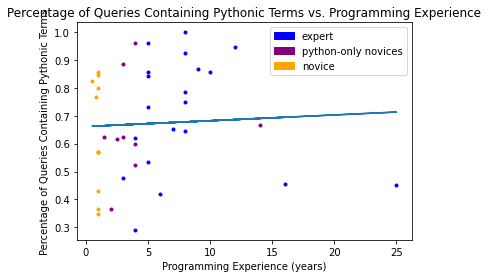

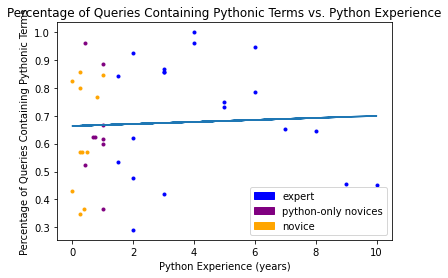

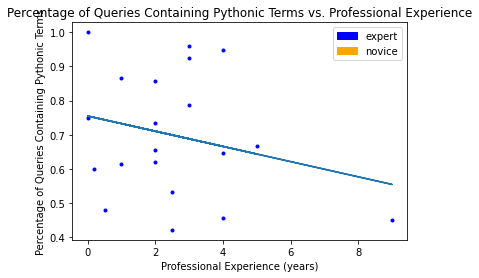

In [16]:
# Show correlations with XP

y = np.asarray(pythonic_query_percentage)

get_xp_correlation(y, "Percentage of Queries Containing Pythonic Terms")